In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('../application_data/cleaned_data_before_transform.csv')
df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,OCCUPATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET,WEEKDAY_APPR_PROCESS_START
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Laborers,0.018801,2,2,0,0,0,0,1,WEDNESDAY
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Core staff,0.003541,1,1,0,0,0,0,0,MONDAY
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Laborers,0.010032,2,2,0,0,0,0,0,MONDAY
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Laborers,0.008019,2,2,0,0,0,0,0,WEDNESDAY
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Core staff,0.028663,2,2,0,1,0,0,0,THURSDAY


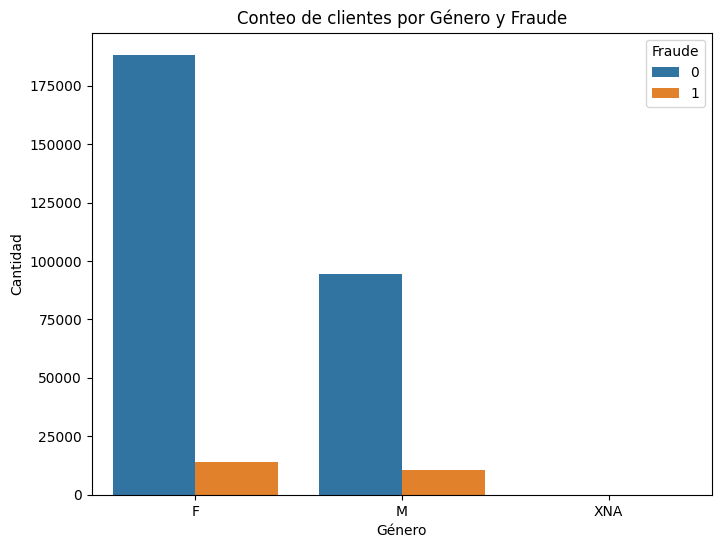

In [3]:
df_gender = df.groupby(["CODE_GENDER", "TARGET"])["TARGET"].count().reset_index(name="count")

# Hacemos el barplot
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_gender,
    x="CODE_GENDER",
    y="count",
    hue="TARGET"   
)
plt.title("Conteo de clientes por Género y Fraude")
plt.ylabel("Cantidad")
plt.xlabel("Género")
plt.legend(title='Fraude', loc='upper right')
plt.show()

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_18796\4278961448.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_count = df_age.groupby(['AGE_BIN','TARGET'])['TARGET'].count().reset_index(name="count")


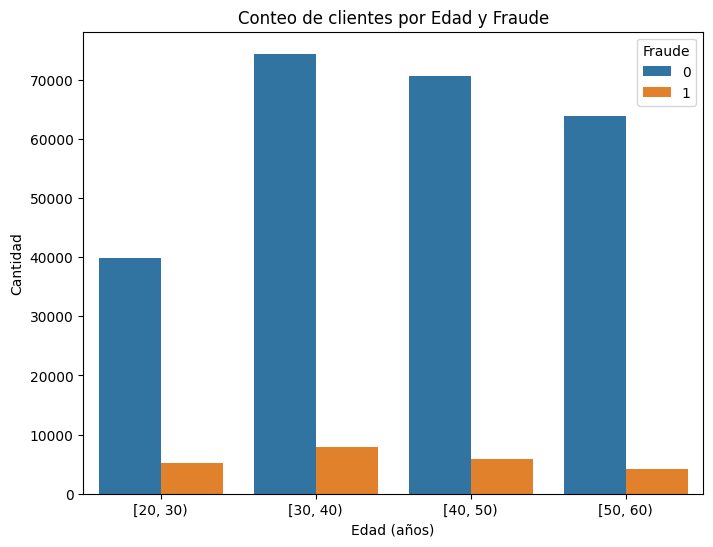

In [4]:
df_age = df[['DAYS_BIRTH','TARGET']].copy()
df_age['YEARS_BIRTH'] = (df_age['DAYS_BIRTH'] / -365).astype(int)
df_age.drop(columns='DAYS_BIRTH')
df_age['AGE_BIN'] = pd.cut(df_age['YEARS_BIRTH'], bins=range(df_age['YEARS_BIRTH'].min(), df_age['YEARS_BIRTH'].max(), 10), right=False)
df_age_count = df_age.groupby(['AGE_BIN','TARGET'])['TARGET'].count().reset_index(name="count")
#df_age_count = df_age.groupby(['YEARS_BIRTH','TARGET'])['TARGET'].count().reset_index(name="count")

# Hacemos el barplot
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_age_count,
    x="AGE_BIN",
    y="count",
    hue="TARGET",
)
plt.title("Conteo de clientes por Edad y Fraude")
plt.ylabel("Cantidad")
plt.xlabel("Edad (años)")
plt.legend(title='Fraude', loc='upper right')
plt.show()

<Axes: xlabel='DAYS_EMPLOYED'>

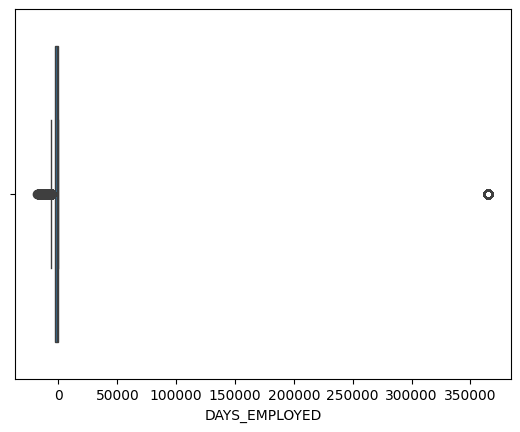

In [12]:
sns.boxplot(data=df, x='DAYS_EMPLOYED')


In [ ]:
df_age = df[['DAYS_EMPLOYED','TARGET']].copy()
df_age['YEARS_BIRTH'] = (df_age['DAYS_EMPLOYED'] / -365).astype(int)
df_age.drop(columns='DAYS_BIRTH')
df_age['AGE_BIN'] = pd.cut(df_age['YEARS_BIRTH'], bins=range(df_age['YEARS_BIRTH'].min(), df_age['YEARS_BIRTH'].max(), 10), right=False)
df_age_count = df_age.groupby(['AGE_BIN','TARGET'])['TARGET'].count().reset_index(name="count")
#df_age_count = df_age.groupby(['YEARS_BIRTH','TARGET'])['TARGET'].count().reset_index(name="count")

# Hacemos el barplot
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_age_count,
    x="AGE_BIN",
    y="count",
    hue="TARGET",
)
plt.title("Conteo de clientes por Edad y Fraude")
plt.ylabel("Cantidad")
plt.xlabel("Edad (años)")
plt.legend(title='Fraude', loc='upper right')
plt.show()

<Axes: xlabel='TARGET', ylabel='AMT_CREDIT'>

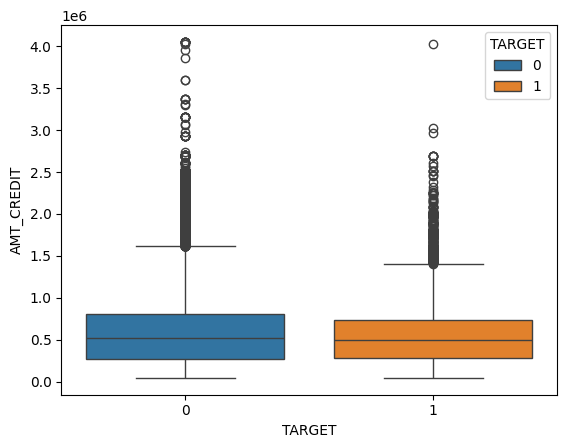

In [5]:
sns.boxplot(data=df, x = 'TARGET',y='AMT_CREDIT',hue='TARGET')

In [6]:
sorted(df['AMT_INCOME_TOTAL'].unique(),reverse=True)[:5]

[117000000.0, 18000090.0, 13500000.0, 9000000.0, 6750000.0]

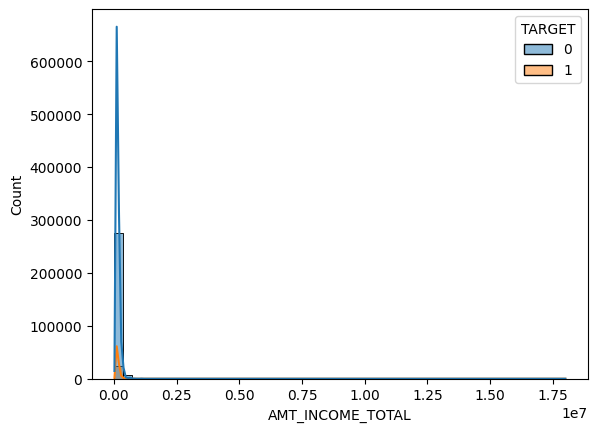

In [7]:
df_filtered = df[df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].max()]
sns.histplot(data=df_filtered, x='AMT_INCOME_TOTAL', bins = 50,kde=True,hue='TARGET')
plt.show()